In [33]:
MODEL_PATH = '../artifacts/model_trainer/model.joblib'
TEST_DATA_PATH = '../artifacts/data_transformation/test.pkl'

In [34]:
import os
%pwd

'f:\\End-to-End-DS-Projects\\Bank Churn Prediction\\research'

In [35]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import joblib

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Loading Holdout Dataset for Churn Prediction

In [36]:
holdout_df = pd.read_pickle(TEST_DATA_PATH)
holdout_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
10878,-0.424660,0,1,1.052984,7,-1.225847,1,0,-1.414024,1
13564,0.148834,1,0,-0.345823,6,0.050648,1,0,-1.123292,1
3959,0.129037,1,1,0.960993,7,0.635708,3,1,-0.273559,1
12402,1.262617,0,0,1.102847,9,0.961190,1,1,-0.427771,1
14151,0.843973,0,0,0.116270,6,0.285444,1,0,0.514320,1
...,...,...,...,...,...,...,...,...,...,...
6713,-0.667665,0,0,0.674932,0,-1.225847,3,1,0.547115,1
2849,-1.588528,0,1,0.198164,9,-1.225847,1,0,-1.356616,0
2618,-1.578181,0,0,-0.850726,1,-1.225847,2,0,0.620879,0
14715,-0.309483,0,1,0.506235,2,1.276084,1,0,-1.316864,1


### Sanity Check

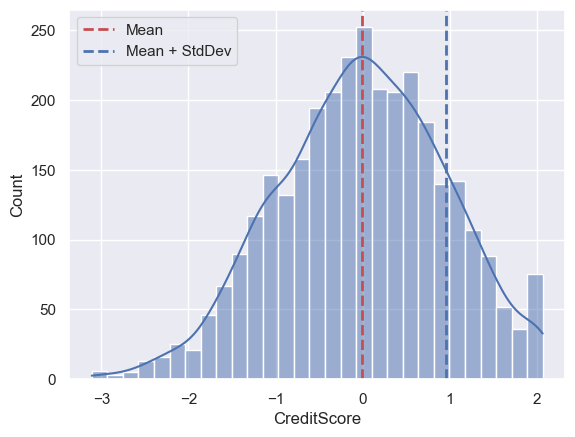

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and standard deviation of CreditScore
mean_credit_score = holdout_df['CreditScore'].mean()
std_credit_score = holdout_df['CreditScore'].std()

# Create histogram with kernel density estimate
sns.histplot(data=holdout_df, x='CreditScore', kde=True)

# Plot mean and standard deviation lines
plt.axvline(mean_credit_score, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_credit_score + std_credit_score, color='b', linestyle='dashed', linewidth=2, label='Mean + StdDev')

# Add legend
plt.legend()

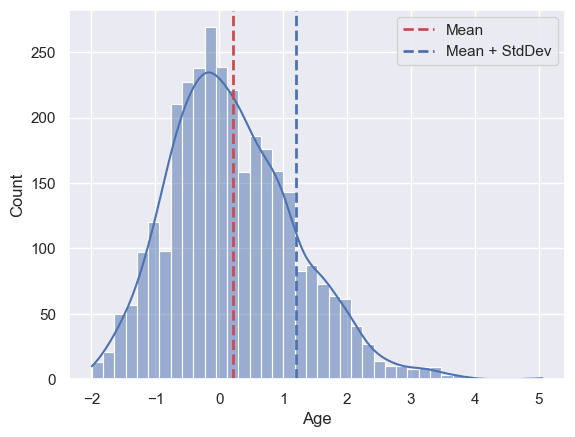

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and standard deviation of age
mean_age = holdout_df['Age'].mean()
std_age = holdout_df['Age'].std()

# Create histogram with kernel density estimate
sns.histplot(data=holdout_df, x='Age', kde=True)

# Plot mean and standard deviation lines
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_age + std_age, color='b', linestyle='dashed', linewidth=2, label='Mean + StdDev')

# Add legend
plt.legend()

### 2. Making Predictions on Holdout Data

In [39]:
holdout_x = holdout_df.drop(columns=['Exited'])
holdout_y = holdout_df['Exited']

In [40]:
holdout_x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
10878,-0.424660,0,1,1.052984,7,-1.225847,1,0,-1.414024
13564,0.148834,1,0,-0.345823,6,0.050648,1,0,-1.123292
3959,0.129037,1,1,0.960993,7,0.635708,3,1,-0.273559
12402,1.262617,0,0,1.102847,9,0.961190,1,1,-0.427771
14151,0.843973,0,0,0.116270,6,0.285444,1,0,0.514320
...,...,...,...,...,...,...,...,...,...
6713,-0.667665,0,0,0.674932,0,-1.225847,3,1,0.547115
2849,-1.588528,0,1,0.198164,9,-1.225847,1,0,-1.356616
2618,-1.578181,0,0,-0.850726,1,-1.225847,2,0,0.620879
14715,-0.309483,0,1,0.506235,2,1.276084,1,0,-1.316864


In [41]:
holdout_y.value_counts()

Exited
1    1596
0    1590
Name: count, dtype: int64

In [42]:
# Loading the model
model  = joblib.load(MODEL_PATH)

In [51]:
predictions = model.predict(holdout_x.values)
predictions

f:\End-to-End-DS-Projects\Bank Churn Prediction\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

### 3. Loading Original Churn Results

In [45]:
holdout_y

10878    1
13564    1
3959     1
12402    1
14151    1
        ..
6713     1
2849     0
2618     0
14715    1
274      0
Name: Exited, Length: 3186, dtype: int64

In [52]:
pd.DataFrame({'Prediction': predictions, 'Actual': holdout_y})

,Prediction,Actual
10878,1,1
13564,1,1
3959,1,1
12402,1,1
14151,1,1
...,...,...
6713,1,1
2849,0,0
2618,0,0
14715,1,1


### Evaluating Predictive Model Performance with F1 Score

In [55]:
print(f"accuracy score = {accuracy_score(holdout_y, predictions)}")
print(f"precision = {precision_score(holdout_y, predictions)}")
print(f"recall = {recall_score(holdout_y, predictions)}")
print(f"f1_score = {f1_score(holdout_y, predictions)}")

accuracy score = 0.86691776522285
precision = 0.8690176322418136
recall = 0.8646616541353384
f1_score = 0.8668341708542714


-------------

In [56]:
import os

In [57]:
%pwd

'f:\\End-to-End-DS-Projects\\Bank Churn Prediction\\research'

In [58]:
os.chdir("../")

In [59]:
%pwd

'f:\\End-to-End-DS-Projects\\Bank Churn Prediction'

In [60]:
import dagshub
dagshub.init(repo_owner='amrahmed95', repo_name='Bank-Chrun-Prediction', mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Initialized MLflow to track repo "amrahmed95/Bank-Chrun-Prediction"

Repository amrahmed95/Bank-Chrun-Prediction initialized!

### Update the entity

In [65]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class ModelEvaluationConfig:
    root_dir: Path
    test_data_path: Path
    model_path: Path
    all_params: dict
    metric_file_name: Path
    target_column: str
    mlflow_uri: str

### Update the configuration manager

In [71]:
from src.BankChurn.constants import *
from src.BankChurn.utils.common import read_yaml, create_directories, save_json

class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    
    def get_model_evaluation_config(self) -> ModelEvaluationConfig:
        config = self.config.model_evaluation
        params = self.params.RandomForest
        schema =  self.schema.TARGET_COLUMN

        create_directories([config.root_dir])

        model_evaluation_config = ModelEvaluationConfig(
            root_dir=config.root_dir,
            test_data_path=config.test_data_path,
            model_path = config.model_path,
            all_params=params,
            metric_file_name = config.metric_file_name,
            target_column = schema.name,
            mlflow_uri="https://dagshub.com/amrahmed95/Bank-Chrun-Prediction.mlflow",
           
        )

        return model_evaluation_config

### Update the components

In [72]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
import numpy as np
import joblib
from src.BankChurn import logger

In [75]:
class ModelEvaluation:
    def __init__(self, config: ModelEvaluationConfig):
        logger.info("Initialize Model Evaluation")
        self.config = config
        
    def evaluate_metrics(self,actual, pred):
        logger.info("Initialize evaluation metrics")
        accuracy = accuracy_score(actual, pred)
        precision = precision_score(actual, pred)
        recall = recall_score(actual, pred)
        f1 = f1_score(actual, pred)
        return accuracy, precision, recall, f1
    
    def log_into_mlflow(self):
        logger.info("Initialize reading data and Log_into_mlflow")
        test_data = pd.read_pickle(self.config.test_data_path)
        model = joblib.load(self.config.model_path)

        test_x = test_data.drop([self.config.target_column], axis=1)
        test_y = test_data[[self.config.target_column]]


        mlflow.set_registry_uri(self.config.mlflow_uri)
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        
        with mlflow.start_run():

            predictions = model.predict(test_x.values)

            (accuracy, precision, recall, f1) = self.evaluate_metrics(test_y, predictions)
            
            # Saving metrics as local
            scores = {"accuracy": accuracy, "precision": precision, "recall": recall, 'f1_score':f1}
            save_json(path=Path(self.config.metric_file_name), data=scores)

            mlflow.log_params(self.config.all_params)

            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("f1_score", f1)


            # Model registry does not work with file store
            if tracking_url_type_store != "file":

                # Register the model
                # There are other ways to use the Model Registry, which depends on the use case,
                # please refer to the doc for more information:
                # https://mlflow.org/docs/latest/model-registry.html#api-workflow
                mlflow.sklearn.log_model(model, "model", registered_model_name="RandomForestModel")
            else:
                mlflow.sklearn.log_model(model, "model")

    

### Update Pipeline

In [76]:
try:
    config = ConfigurationManager()
    model_evaluation_config = config.get_model_evaluation_config()
    model_evaluation_config = ModelEvaluation(config=model_evaluation_config)
    model_evaluation_config.log_into_mlflow()
except Exception as e:
    raise e

[2024-06-11 01:38:14,791: 31 - Bank Churn Project Logger: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-06-11 01:38:14,797: 31 - Bank Churn Project Logger: INFO: common: yaml file: params.yaml loaded successfully]
[2024-06-11 01:38:14,802: 31 - Bank Churn Project Logger: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-06-11 01:38:14,805: 51 - Bank Churn Project Logger: INFO: common: created directory at: artifacts]
[2024-06-11 01:38:14,807: 51 - Bank Churn Project Logger: INFO: common: created directory at: artifacts/model_evaluation]
[2024-06-11 01:38:14,809: 3 - Bank Churn Project Logger: INFO: 2558362596: Initialize Model Evaluation]
[2024-06-11 01:38:14,811: 15 - Bank Churn Project Logger: INFO: 2558362596: Initialize reading data and Log_into_mlflow]
[2024-06-11 01:38:15,253: 7 - Bank Churn Project Logger: INFO: 2558362596: Initialize evaluation metrics]
[2024-06-11 01:38:15,295: 65 - Bank Churn Project Logger: INFO: common: json file saved

f:\End-to-End-DS-Projects\Bank Churn Prediction\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Successfully registered model 'RandomForestModel'.
2024/06/11 01:39:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestModel, version 1
Created version '1' of model 'RandomForestModel'.
